Final Run Statistics: Van der Pol (implicit) with time events 

 Number of steps                                 : 1119
 Number of function evaluations                  : 9387
 Number of Jacobian evaluations                  : 800
 Number of function eval. due to Jacobian eval.  : 1600
 Number of error test failures                   : 46
 Number of LU decompositions                     : 1021
 Number of time events                           : 4

Solver options:

 Solver                  : Radau5 (implicit)
 Tolerances (absolute)   : 1e-06
 Tolerances (relative)   : 1e-06

Simulation interval    : 0.0 - 8.0 seconds.
Elapsed simulation time: 0.22386099999999942 seconds.


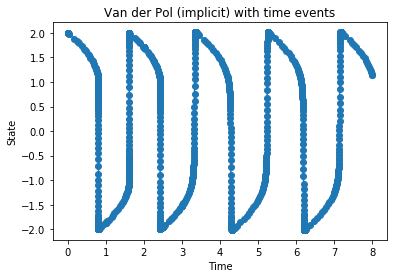

In [9]:
#!/usr/bin/env python 
# -*- coding: utf-8 -*-

# Copyright (C) 2010 Modelon AB
#
# This program is free software: you can redistribute it and/or modify
# it under the terms of the GNU Lesser General Public License as published by
# the Free Software Foundation, version 3 of the License.
#
# This program is distributed in the hope that it will be useful,
# but WITHOUT ANY WARRANTY; without even the implied warranty of
# MERCHANTABILITY or FITNESS FOR A PARTICULAR PURPOSE. See the
# GNU Lesser General Public License for more details.
#
# You should have received a copy of the GNU Lesser General Public License
# along with this program. If not, see <http://www.gnu.org/licenses/>.

import numpy as N
import pylab as P
import nose
from assimulo.solvers import Radau5DAE
from assimulo.problem import Implicit_Problem


class VanDerPolProblem(Implicit_Problem):
    def __init__(self, **kargs):
        Implicit_Problem.__init__(self, **kargs)
        self.name = 'Van der Pol (implicit) with time events'
        self.my = 1.0/1e-6
        
    #Define the residual
    def res(self, t,y,yd):
        yd_0 = y[1]
        yd_1 = self.my*((1.-y[0]**2)*y[1]-y[0])
        
        res_0 = yd[0]-yd_0
        res_1 = yd[1]-yd_1
        return N.array([res_0,res_1])
    
    def time_events(self, t,y,yd,sw):
        events = [1.0, 2.0, 2.5, 3.0]
        for ev in events:
            if t < ev:
                tnext = ev
                break
            else:
                tnext = None
        return tnext
        
    def handle_event(self, solver, event_info):
        self.my *= 1e-1

def run_example(with_plots=True):
    
    y0 = [2.0,-0.6] #Initial conditions
    yd0 = [-.6,-200000.]
    
    #Define an extended Assimulo problem
    imp_mod = VanDerPolProblem(y0=y0,yd0=yd0)

    #Define an explicit solver
    imp_sim = Radau5DAE(imp_mod) #Create a Radau5 solver

    #Simulate
    t, y, yd = imp_sim.simulate(8.) #Simulate 8 seconds
    
    #Plot
    if with_plots:
        P.plot(t,y[:,0], marker='o')
        P.xlabel('Time')
        P.ylabel('State')
        P.title(imp_mod.name)
        P.show()
    
    #Basic test
    x1 = y[:,0]
    assert N.abs(x1[-1]-1.14330840983) < 1e-3 #For test purpose
    return imp_mod, imp_sim

if __name__=='__main__':
    mod,sim = run_example()
